# Part I - (Ford GoBike System Data )
## by (Aisha)

## Introduction
In this first part, i will conduct an exploratory data analysis  Useing Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns, and relationships.


## Preliminary Wrangling


In [44]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
%matplotlib inline

In [45]:
#read the data 
df = pd.read_csv('201902-fordgobike-tripdata.csv');
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [46]:
#we have 183412 rows and 16 columns
df.shape 

(183412, 16)

### What is the structure of your dataset?
 the structurs is 183412 rows and 16 columns 


### What is/are the main feature(s) of interest in your dataset?

> The relationship between  age and gender 

> The relationship between  user type and gender 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> gender , user type ,age and duration

# cleaning 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [48]:
# remove nulls values
df=df[df['member_birth_year'].isnull() == False]
df=df[df['start_station_name'].isnull() == False]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [50]:
df["start_time"].values

array(['2019-02-28 17:32:10.1450', '2019-02-28 12:13:13.2180',
       '2019-02-28 17:54:26.0100', ..., '2019-02-01 00:06:05.5490',
       '2019-02-01 00:05:34.3600', '2019-02-01 00:00:20.6360'],
      dtype=object)

In [51]:
# split start_time 



#make extra column
df['start_time1']= None

# set indexes
index_start_time= df.columns.get_loc("start_time")
index_start_time1= df.columns.get_loc("start_time1")

# dfine the pattern 
start_time1_pattern = r'([0-9]{2}\:[0-9]{2}\:[0-9]{2}\.[0-9]{4})'

#looking for start_data in DataFrame
for row in range (0 , len (df)):
    start_time1 = re.search(start_time1_pattern , df.iat[row , index_start_time]).group()
    df.iat[row , index_start_time1]=start_time1
   

In [52]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time1
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17:32:10.1450
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12:13:13.2180
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17:54:26.0100
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23:54:18.5490
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,23:49:58.6320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,00:04:49.7240
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,00:05:34.7440
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,00:06:05.5490
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,00:05:34.3600


In [53]:
# split start_time 



#make extra column
df['start_date']= None

# srt indexes
index_start_time= df.columns.get_loc("start_time")
index_start_date= df.columns.get_loc("start_date")

# dfine the pattern 
date_pattern = r'([0-9]{4}\-[0-9]{2}\-[0-9]{2})'

#looking for start_data in DataFrame
for row in range (0 , len (df)):
    start_date = re.search(date_pattern , df.iat[row , index_start_time]).group()
    df.iat[row , index_start_date]=start_date
   

In [54]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time1,start_date
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17:32:10.1450,2019-02-28
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12:13:13.2180,2019-02-28
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17:54:26.0100,2019-02-28
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23:54:18.5490,2019-02-28
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,23:49:58.6320,2019-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,00:04:49.7240,2019-02-01
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,00:05:34.7440,2019-02-01
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,00:06:05.5490,2019-02-01
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,00:05:34.3600,2019-02-01


In [55]:
# split end_time



#make extra column
df['end_date']= None

# srt indexes
index_end_time= df.columns.get_loc("end_time")
index_end_date= df.columns.get_loc("end_date")

# dfine the pattern 
end_date_pattern = r'([0-9]{4}\-[0-9]{2}\-[0-9]{2})'

#looking for start_data in DataFrame
for row in range (0 , len (df)):
    end_date = re.search(end_date_pattern , df.iat[row , index_end_time]).group()
    df.iat[row , index_end_date]=end_date

In [56]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time1,start_date,end_date
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17:32:10.1450,2019-02-28,2019-03-01
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12:13:13.2180,2019-02-28,2019-03-01
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17:54:26.0100,2019-02-28,2019-03-01
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23:54:18.5490,2019-02-28,2019-03-01
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,23:49:58.6320,2019-02-28,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,00:04:49.7240,2019-02-01,2019-02-01
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,00:05:34.7440,2019-02-01,2019-02-01
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,00:06:05.5490,2019-02-01,2019-02-01
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,00:05:34.3600,2019-02-01,2019-02-01


In [57]:
# split start_time 



#make extra column
df['end_time1']= None

# set indexes
index_end_time= df.columns.get_loc("end_time")
index_end_time1= df.columns.get_loc("end_time1")

# dfine the pattern 
end_time1_pattern = r'([0-9]{2}\:[0-9]{2}\:[0-9]{2}\.[0-9]{4})'

#looking for start_data in DataFrame
for row in range (0 , len (df)):
    end_time1 = re.search(end_time1_pattern , df.iat[row , index_end_time]).group()
    df.iat[row , index_end_time1]=end_time1
   

In [58]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time1,start_date,end_date,end_time1
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17:32:10.1450,2019-02-28,2019-03-01,08:01:55.9750
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12:13:13.2180,2019-02-28,2019-03-01,05:24:08.1460
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17:54:26.0100,2019-02-28,2019-03-01,04:02:36.8420
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23:54:18.5490,2019-02-28,2019-03-01,00:20:44.0740
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,23:49:58.6320,2019-02-28,2019-03-01,00:19:51.7600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,00:04:49.7240,2019-02-01,2019-02-01,00:12:50.0340
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,00:05:34.7440,2019-02-01,2019-02-01,00:10:48.5020
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,00:06:05.5490,2019-02-01,2019-02-01,00:08:27.2200
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,00:05:34.3600,2019-02-01,2019-02-01,00:07:54.2870


In [59]:
df= df.drop("end_time", axis='columns')
df= df.drop("start_time", axis='columns')


In [60]:
#re-arrange columns in the data frame
df=df[['bike_id','duration_sec' , 'start_date' , 'start_time1' , 'end_date' ,'end_time1' ,'start_station_id', 'start_station_name','start_station_latitude' , 'start_station_longitude', 'end_station_id','end_station_name', 'end_station_latitude','end_station_longitude','user_type','member_birth_year','member_gender','bike_share_for_all_trip' ]]
df

,bike_id,duration_sec,start_date,start_time1,end_date,end_time1,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,4902,52185,2019-02-28,17:32:10.1450,2019-03-01,08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984.0,Male,No
2,5905,61854,2019-02-28,12:13:13.2180,2019-03-01,05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972.0,Male,No
3,6638,36490,2019-02-28,17:54:26.0100,2019-03-01,04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,Subscriber,1989.0,Other,No
4,4898,1585,2019-02-28,23:54:18.5490,2019-03-01,00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,1974.0,Male,Yes
5,5200,1793,2019-02-28,23:49:58.6320,2019-03-01,00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,4832,480,2019-02-01,00:04:49.7240,2019-02-01,00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,Subscriber,1996.0,Male,No
183408,4960,313,2019-02-01,00:05:34.7440,2019-02-01,00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,Subscriber,1984.0,Male,No
183409,3824,141,2019-02-01,00:06:05.5490,2019-02-01,00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,Subscriber,1990.0,Male,Yes
183410,5095,139,2019-02-01,00:05:34.3600,2019-02-01,00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,Subscriber,1988.0,Male,No


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   bike_id                  174952 non-null  int64  
 1   duration_sec             174952 non-null  int64  
 2   start_date               174952 non-null  object 
 3   start_time1              174952 non-null  object 
 4   end_date                 174952 non-null  object 
 5   end_time1                174952 non-null  object 
 6   start_station_id         174952 non-null  float64
 7   start_station_name       174952 non-null  object 
 8   start_station_latitude   174952 non-null  float64
 9   start_station_longitude  174952 non-null  float64
 10  end_station_id           174952 non-null  float64
 11  end_station_name         174952 non-null  object 
 12  end_station_latitude     174952 non-null  float64
 13  end_station_longitude    174952 non-null  float64
 14  user

In [62]:
#convert data type 
df.start_date=pd.to_datetime(df.start_date)
df.start_time1 = pd.to_datetime(df.start_time1)
df.end_date=pd.to_datetime(df.end_date)
df.end_time1 = pd.to_datetime(df.end_time1)


In [63]:
df.isna().sum()

bike_id                    0
duration_sec               0
start_date                 0
start_time1                0
end_date                   0
end_time1                  0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [64]:
#  drop the column that do not have any NaN/None values
na_counts = df.drop(['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year' , 'member_gender'], axis=1).isna().sum()
print(na_counts)

bike_id                    0
duration_sec               0
start_date                 0
start_time1                0
end_date                   0
end_time1                  0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
user_type                  0
bike_share_for_all_trip    0
dtype: int64


In [65]:
df_gene = df.query('member_gender == "Other"');
df_gene

,bike_id,duration_sec,start_date,start_time1,end_date,end_time1,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip
3,6638,36490,2019-02-28,2023-01-12 17:54:26.010,2019-03-01,2023-01-12 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,Subscriber,1989.0,Other,No
8,6548,1570,2019-02-28,2023-01-12 23:41:48.790,2019-03-01,2023-01-12 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,Subscriber,1988.0,Other,No
131,5649,1187,2019-02-28,2023-01-12 22:39:58.560,2019-02-28,2023-01-12 22:59:46.206,262.0,West St at University Ave,37.869967,-122.286533,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,Subscriber,1993.0,Other,No
135,6065,544,2019-02-28,2023-01-12 22:48:12.730,2019-02-28,2023-01-12 22:57:17.080,356.0,Valencia St at Clinton Park,37.769188,-122.422285,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,Subscriber,1991.0,Other,No
190,5234,515,2019-02-28,2023-01-12 22:28:11.347,2019-02-28,2023-01-12 22:36:46.389,58.0,Market St at 10th St,37.776619,-122.417385,321.0,5th St at Folsom,37.780146,-122.403071,Subscriber,1981.0,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183346,5450,312,2019-02-01,2023-01-12 02:06:04.566,2019-02-01,2023-01-12 02:11:17.122,175.0,49th St at Telegraph Ave,37.835946,-122.262366,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,Subscriber,1997.0,Other,Yes
183349,1172,527,2019-02-01,2023-01-12 01:48:54.755,2019-02-01,2023-01-12 01:57:42.540,213.0,32nd St at Adeline St,37.823847,-122.281193,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,Subscriber,1997.0,Other,Yes
183378,4960,659,2019-02-01,2023-01-12 00:53:36.143,2019-02-01,2023-01-12 01:04:35.371,47.0,4th St at Harrison St,37.780955,-122.399749,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,Subscriber,1985.0,Other,No
183381,3535,426,2019-02-01,2023-01-12 00:48:54.159,2019-02-01,2023-01-12 00:56:00.474,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,213.0,32nd St at Adeline St,37.823847,-122.281193,Subscriber,1997.0,Other,Yes


In [66]:
df['Age'] = (2023 - df['member_birth_year'])

# Univariate Exploration

How many subscribers and customers?

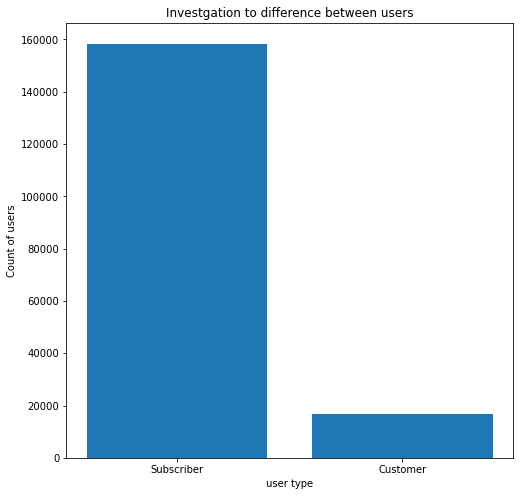

In [67]:
#User type distribution using bar chart
plt.figure(figsize=[8,8])
plt.bar(x= df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.title('Investgation to difference between users')
plt.xlabel('user type')
plt.ylabel('Count of users')
plt;

as we see there is a big difference between  Subscriber users  and Customer users , number of  Subscriber users is about 160000 and umber of  Customer users is about 20000

How old are they?

Text(0, 0.5, 'count')

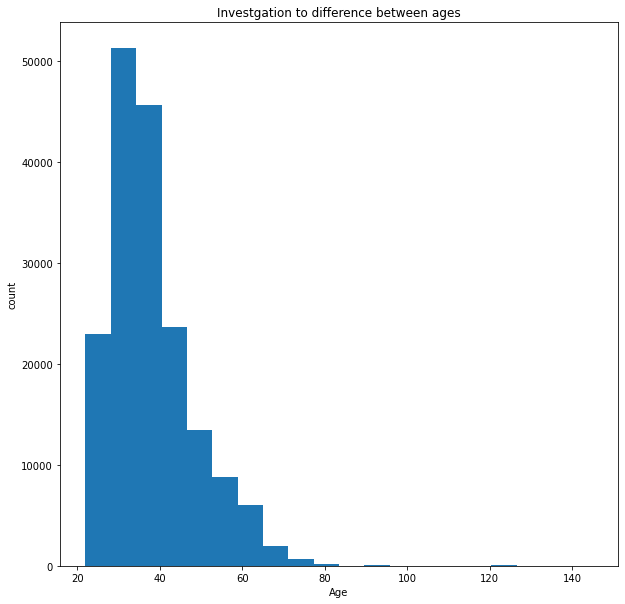

In [68]:
#Age distribution using HISTOGRAM
plt.figure(figsize=[10,10])
plt.hist(data = df, x = 'Age', bins = 20);
plt.title('Investgation to difference between ages')
plt.xlabel('Age')
plt.ylabel('count')

- there is gap between 100- 120 
- left skewed data 
- outlier 140
- As we see , most of the age group is between 30-40 years old,

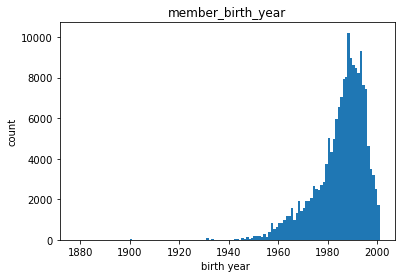

In [69]:
plt.hist(data = df, x ='member_birth_year', bins =  np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+1, 1));
plt.xlabel('birth year ')
plt.ylabel('count')
plt.title('member_birth_year')
plt;

- right skewed data 

what is the age groups?

Text(0.5, 1.0, 'member_birth_year')

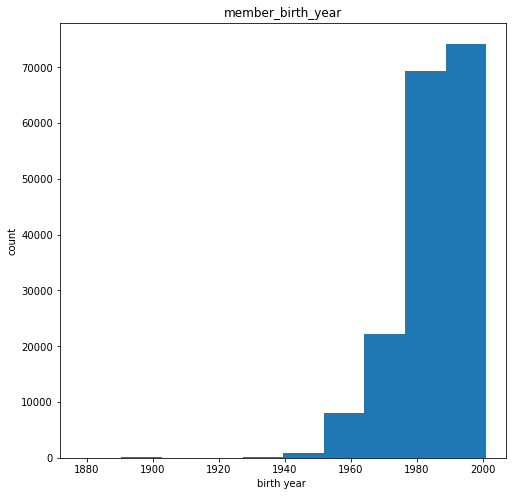

In [70]:
#birth year distribution using HISTOGRAM
plt.figure(figsize=[8,8])
plt.hist(data = df, x = 'member_birth_year', bins = 10);
plt.xlabel('birth year ')
plt.ylabel('count')
plt.title('member_birth_year')

- there is gap between 2000- 1900
- right skewed data 
- outlier 1900
-The histogram shows that the most popular age group is from 1980 to 2000
And the least popular is from 1880 to 1940

classification of their genders?

Text(0.5, 1.0, 'gender')

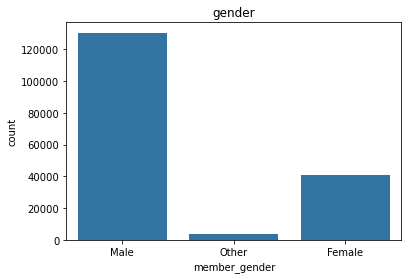

In [71]:
# Gender distribution using bar chart
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='member_gender', color=base_color);
plt.title('gender')

It is clear that there is a big difference between male and female users, as the number of male users is about 125,000, while the number of female users is 40,000, and a small percentage of other users

most starting date ?

Text(0.5, 1.0, 'start date')

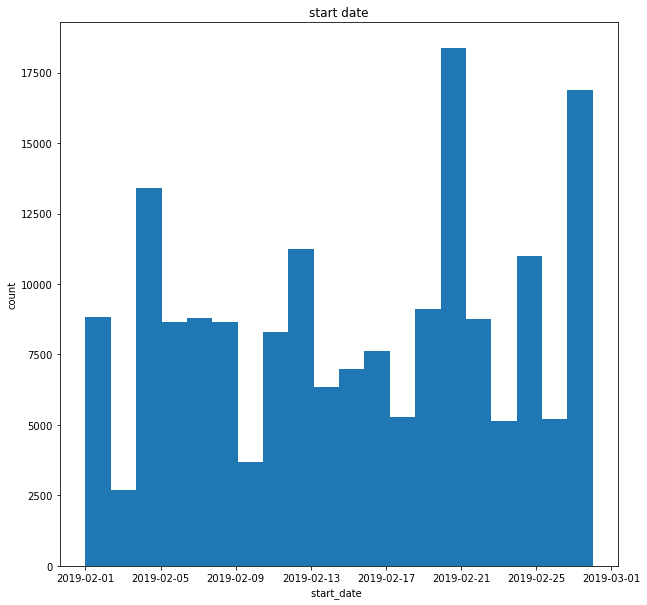

In [72]:
#Start_date distribution using HISTOGRAM
plt.figure(figsize=[10,10])
plt.hist(data = df, x = 'start_date', bins = 20);
plt.xlabel('start_date  ')
plt.ylabel('count')
plt.title('start date')

as we can  see the most starting date is 2019-02-21

most end date ?

Text(0.5, 1.0, ' end_date')

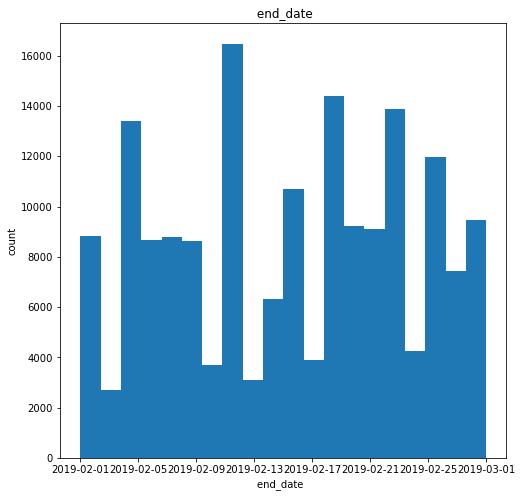

In [73]:
#Start_date distribution using HISTOGRAM
plt.figure(figsize=[8,8])
plt.hist(data = df, x = 'end_date', bins = 20);
plt.xlabel('end_date  ')
plt.ylabel('count')
plt.title(' end_date')

as we  see the most end date between 2019-02-09 to  2019-02-13

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Subscribers more than customers by about 130000
>in age there is gap between 100- 120,outlier 140
> males more than any other gender
> in "member_birth_year" there is gap between 2000- 1900 , outlier 1900

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Age was calculated and added as a column

In [74]:
# calculate the distance
from math import sin, cos, sqrt, atan2, radians
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [75]:

df['dis'] = df.apply(lambda row: calculate_distance(row['start_station_latitude'],row['start_station_longitude'],row['end_station_latitude'],row['end_station_longitude']),axis=1)
df.head()

,bike_id,duration_sec,start_date,start_time1,end_date,end_time1,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,dis
0,4902,52185,2019-02-28,2023-01-12 17:32:10.145,2019-03-01,2023-01-12 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984.0,Male,No,39.0,0.544879
2,5905,61854,2019-02-28,2023-01-12 12:13:13.218,2019-03-01,2023-01-12 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972.0,Male,No,51.0,2.705394
3,6638,36490,2019-02-28,2023-01-12 17:54:26.010,2019-03-01,2023-01-12 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,Subscriber,1989.0,Other,No,34.0,0.260820
4,4898,1585,2019-02-28,2023-01-12 23:54:18.549,2019-03-01,2023-01-12 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,1974.0,Male,Yes,49.0,2.410058
5,5200,1793,2019-02-28,2023-01-12 23:49:58.632,2019-03-01,2023-01-12 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,Subscriber,1959.0,Male,No,64.0,3.333249


In [76]:
(df['duration_sec'].describe())

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [77]:

np.log10(df['dis'].describe())

C:\Users\bussma\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.242919
mean     0.228036
std      0.040326
min          -inf
25%     -0.040611
50%      0.155421
75%      0.347273
max      1.841929
Name: dis, dtype: float64

In [78]:
df['duration_mins']=df['duration_sec']/60

# Bivariate Exploration

 Distance & Duration by minutes 

Text(0.5, 1.0, ' Duration & distance')

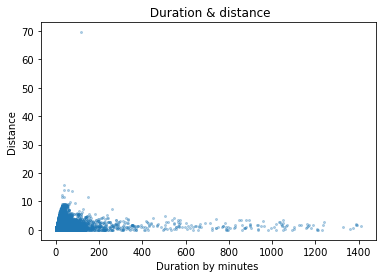

In [79]:
# Scatter plot
plt.scatter(data = df, x = 'duration_mins', y = 'dis', alpha = 0.3 , s= 4);
plt.xlabel('Duration by minutes ')
plt.ylabel('Distance')

plt.title(' Duration & distance')

from the minute 0-200, the duration does not reach 20
Then it starts to decrease very little

What is the age group of the subscribers and the age group of the customers?

Text(0.5, 1.0, ' year of birth & user type')

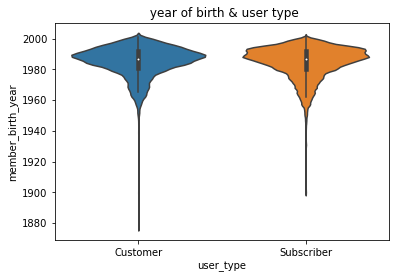

In [80]:
sb.violinplot(data = df, x = 'user_type', y = 'member_birth_year');

plt.title(' year of birth & user type')

The age group of subscribers is almost the same as the age group of customers

Duration and relationship between the sexes

Text(0.5, 1.0, ' gender & distance')

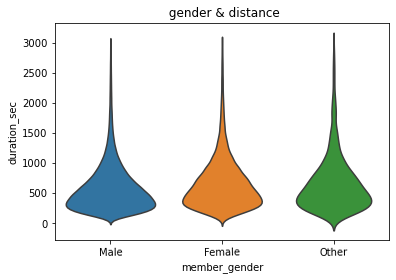

In [81]:
sb.violinplot(data = df.query("duration_sec <= 3000.0"),x = 'member_gender',y='duration_sec',inner=None);
plt.xticks(rotation=1);



plt.title(' gender & distance')

Males' flights last about 400 seconds, with females spending a shorter period

Duration and relationship between the subscriber & customer 

Text(0.5, 1.0, ' user type  & distance')

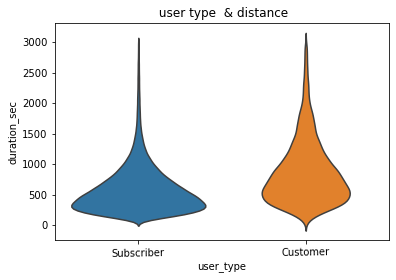

In [82]:
sb.violinplot(data = df.query("duration_sec <= 3000.0"),x = 'user_type',y='duration_sec',inner=None);
plt.xticks(rotation=1);



plt.title(' user type  & distance')

subscribrs' flights last about 400 seconds, with customers  spending a shorter period

year of birth and  relationship between gender 

Text(0.5, 1.0, ' year of birth & gender')

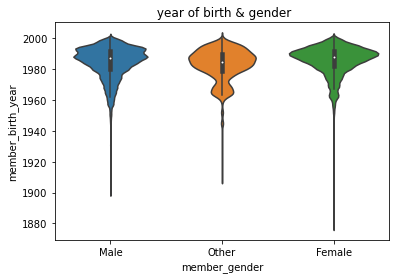

In [83]:
sb.violinplot(data = df, x = 'member_gender', y = 'member_birth_year');



plt.title(' year of birth & gender')

In 1990, the number of females was more than males

Distance and relationship between the user type

Text(0.5, 1.0, ' user type  & distance')

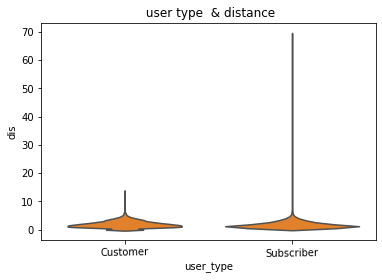

In [84]:
sb.violinplot(data = df.query("dis <= 2225+ 1.5*1314"),x = 'user_type',y='dis',color = sb.color_palette()[1],inner=None);
plt.xticks(rotation=1);

plt.title(' user type  & distance')

There is a closeness in distance

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We note that from the minute 0-200, the duration does not reach 20
Then it starts to decrease very little

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

relationship between duration_sec and user type and Age 

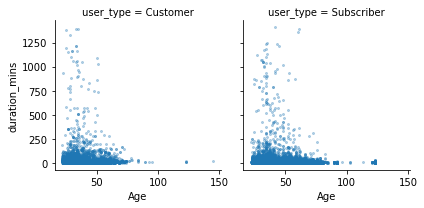

In [85]:

user_type = sb.FacetGrid(data = df, col = 'user_type')
user_type.map(plt.scatter, 'Age', 'duration_mins', alpha = 0.3 , s= 4)
plt;



as We see that customrs and subscriber with age between 20 and 50 have shown a high incidence in spending lower than 3000 sec duration 


duration and relationship between age and gender 

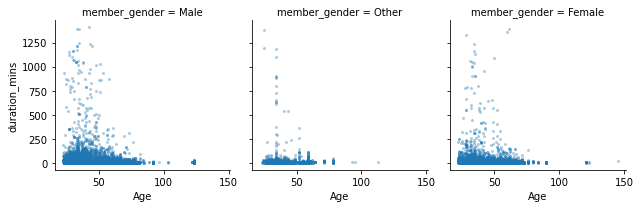

In [86]:

gender = sb.FacetGrid(data = df, col = 'member_gender')
gender.map(plt.scatter, 'Age', 'duration_mins', alpha = 0.3 , s= 4)
plt;


relationship between age and gender and age 

as We  see that Male with age between 20 and 55 have shown a high occurence in spending lower than 3000 sec duration where females with the same range of age have shown high occurence in spending  about 2000 sec duration

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a relationship between age and duration 
Whereas, from the age of 20 to 50, the duration is high. Then the duration decreases

### Were there any interesting or surprising interactions between features?

> I observed that the duration in males is higher than in females

[NbConvertApp] Converting notebook Explanatory_Data_Visualization.ipynb to slides
[NbConvertApp] Writing 641326 bytes to Explanatory_Data_Visualization.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\bussma\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\bussma\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\bussma\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\bussma\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\bussma\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_noteboo

## Reference

> Udacity lessons

>"https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude"